<a href="https://colab.research.google.com/github/do0309/P2M-Data-Augmentation/blob/main/albumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import albumentations as A
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imshow

# def des fonctions

In [ ]:
def load_image(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [ ]:
def view_transform(image,transform):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8))

    ax[0].imshow(image,cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title("Original Image", size=20)

    ax[1].set_axis_off()
    ax[1].imshow(transform , cmap='gray')
    ax[1].set_title("Transformed", size=20)


# Augmentation functions

In [ ]:
def norm(image):
  norm=A.Normalize(mean=(0, 0, 0), std=(1, 1, 1), max_pixel_value=255.0, p=1.0)
  image=norm(image=image)['image']
  return image

In [ ]:
def resize_im(image,w,h):
  resize=A.resize(width=w,height=h)
  img=resize(image=image)['image']
  return img 

In [ ]:
def Hflip_im(image):
  Hflip=A.HorizontalFlip(p=1)
  image=Hflip(image=image)['image']
  return image 

In [ ]:
def Vflip_im(image):
  Vflip=A.VerticalFlip(p=1)
  image=Vflip(image=image)['image']
  return image 

In [ ]:
def rotate(image,d,f):
  rot=A.Rotate(limit=[d,f], p=1)
  image=rot(image=image)['image']
  return image

In [ ]:
''' x_min (int) – minimum upper left x coordinate
    y_min (int) – minimum upper left y coordinate
    x_max (int) – maximum lower right x coordinate
    y_max (int) – maximum lower right y coordinate'''

def crop_im(image,a,b,c,d):  
  crop=A.Crop(x_min=a, y_min=b, x_max=c, y_max=d, p=1.0)
  image=crop(image=image)['image']
  return image

In [ ]:
def transpose(image,x,y):
  return image 

In [ ]:
def brightness_contrast(image,b,c):
  bright_cont=A.RandomBrightnessContrast(brightness_limit=b, contrast_limit=c, p=1)
  image=bright_cont(image=image)['image']
  return image

In [ ]:
def gamma(image,d,f):
  gam=A.RandomGamma(gamma_limit=(d,f),p=1)
  image=gam(image=image)['image']
  return image 

In [ ]:
#hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20 a étudier 
def HueSatVal(image,a=20,b=30,c=20):
  Hue_sat=A.HueSaturationValue(hue_shift_limit=a, sat_shift_limit=b, val_shift_limit=c, p=1)
  image=Hue_sat(image=image)['image']
  return image

In [ ]:
def CLAHE(image,clip=0.4,):
  clahe=A.CLAHE (clip_limit=clip, tile_grid_size=(8, 8),p=1)
  image=clahe(image=image)['image']
  return image

In [ ]:
#blur limit a verifier
def gaussianBlur(image,sigma=0):
  GB= A.GaussianBlur(blur_limit=(3,7), sigma_limit=sigma, p=1)
  image=GB(image=image)['image']
  return image

In [ ]:
#blur limit a verifier
def MedianBlur(image):
  MB= A.MedianBlu (blur_limit=7,p=1)
  image=MB(image=image)['image']
  return image


# Test sur Ultrasound

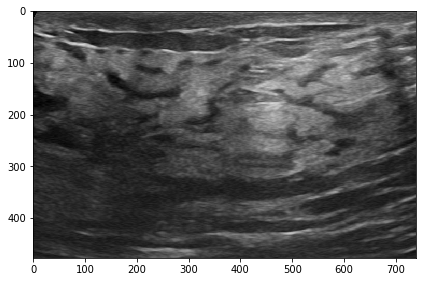

In [ ]:
img_path="/content/drive/MyDrive/Colab Notebooks/normal (130).jpeg"
image=load_image(img_path)
imshow(image)

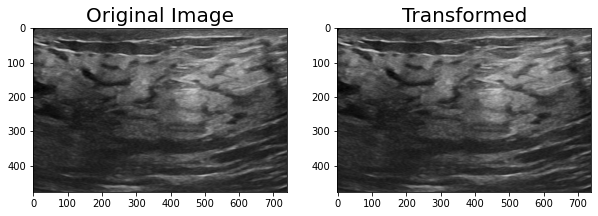

In [ ]:
norm_img=norm(image)
view_transform(image, norm_img)

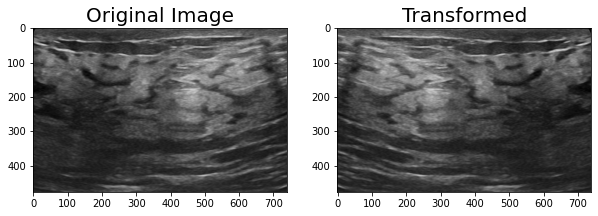

In [ ]:
Hflip_img=Hflip_im(image)
view_transform(image, Hflip_img)

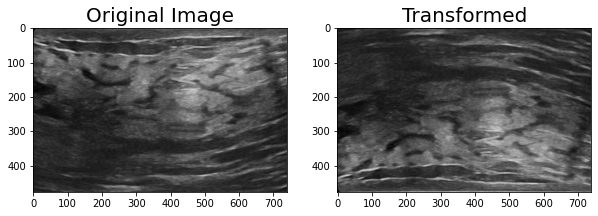

In [ ]:
Vflip_img=Vflip_im(image)
view_transform(image,Vflip_img)

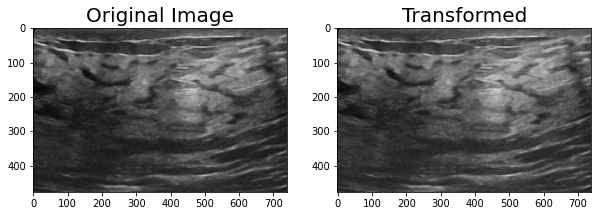

In [ ]:
gam_img=gamma(image,100,150)
view_transform(image,gam_img)

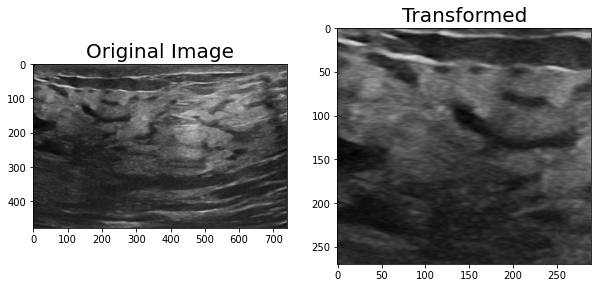

In [ ]:
crop_img=crop_im(image,10,30,300,300)
view_transform(image, crop_img)

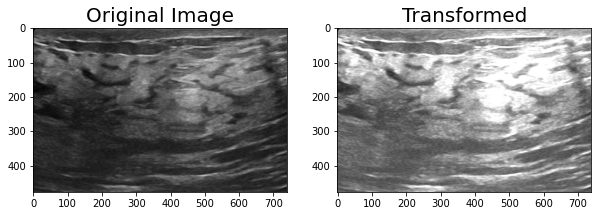

In [ ]:
cont_img=brightness_contrast(image,0.5,0.7)
view_transform(image,cont_img)

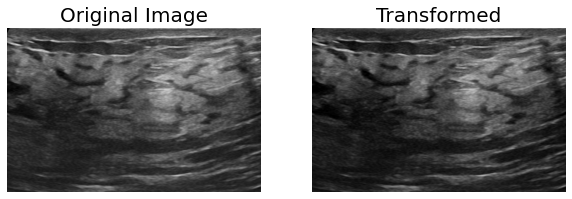

In [ ]:
HueSat_img=HueSatVal(image,40)
view_transform(image,HueSat_img)



# Test sur Mammography

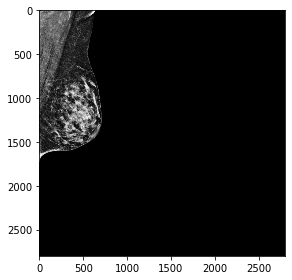

In [ ]:
img_path="/content/drive/MyDrive/Colab Notebooks/Mamoghraphy/101_4_C_1000_RMLO_0.jpg"
image=load_image(img_path)
imshow(image)

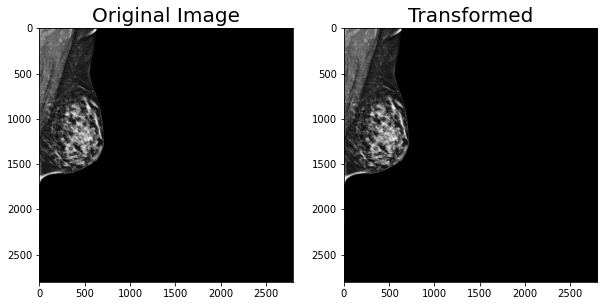

In [ ]:
norm_img=norm(image)
view_transform(image, norm_img)

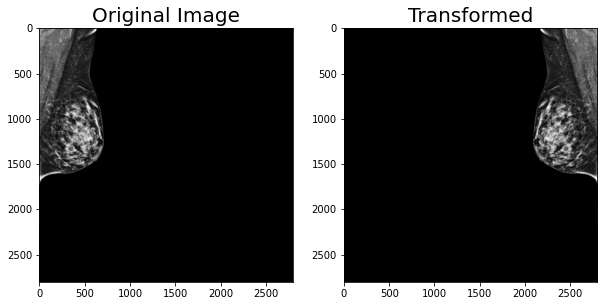

In [ ]:
Hflip_img=Hflip_im(image)
view_transform(image, Hflip_img)

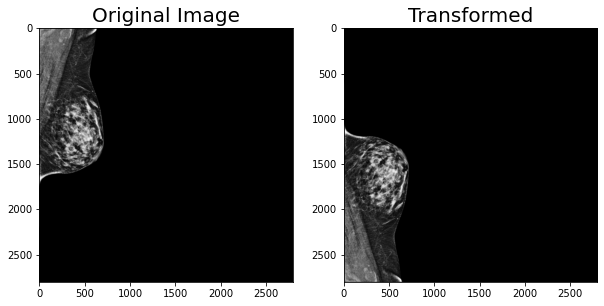

In [ ]:
Vflip_img=Vflip_im(image)
view_transform(image, Vflip_img)

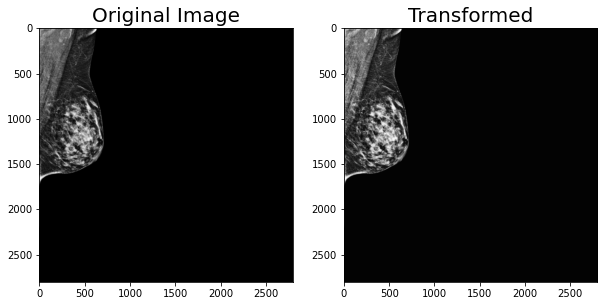

In [ ]:
cl_img=CLAHE(image,0.9)
view_transform(image, cl_img)

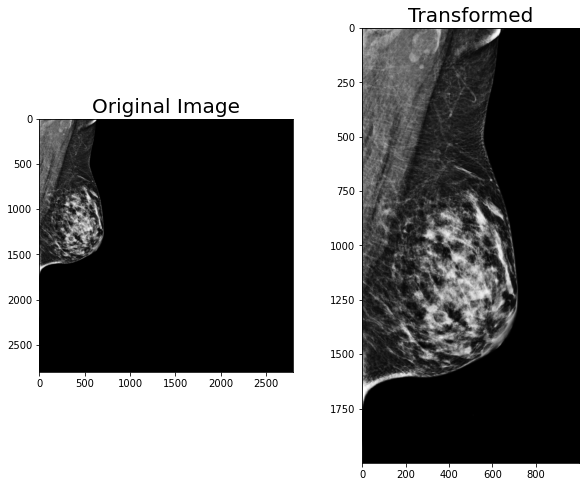

In [ ]:
crop_img=crop_im(image,0,0,1000,2000)
view_transform(image, crop_img)

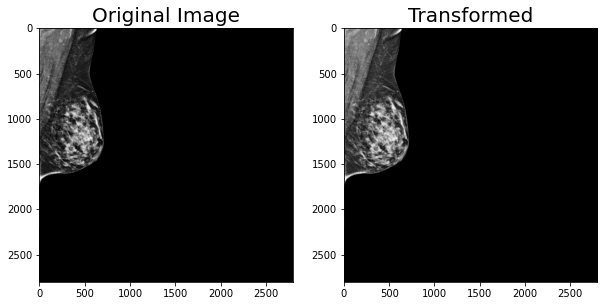

In [ ]:
gam_img=gamma(image,100,150)
view_transform(image, gam_img)

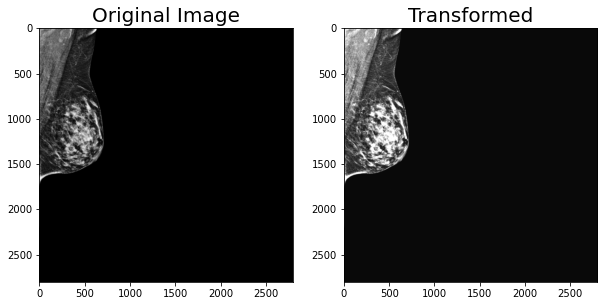

In [ ]:
br_img=brightness_contrast(image,1,0.7)
view_transform(image, br_img)

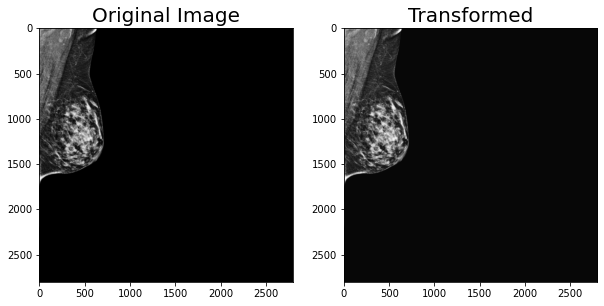

In [ ]:
HueSat_img=HueSatVal(image)
view_transform(image, HueSat_img)